Importing Libraries and Data Set

In [1]:
import pandas as pd
import numpy as np
import datetime

#Libraries for data visualization
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Libraries for text pre-processing
import re
import nltk
# Stopwords needs to be downloaded before use
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer 
from nltk.tokenize import word_tokenize
# WordNetLemmatizer needs to be downloaded before use
from nltk.stem.wordnet import WordNetLemmatizer
#To track function execution
from tqdm import tqdm
from bs4 import BeautifulSoup

#Libraries for text preparation and visualization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from scipy.sparse import coo_matrix

#Libraries for Sentimental analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Libraries for building machine learning model
import spacy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics

#Library to load and dump the model
from joblib import dump, load
import pickle

#Downloads
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\holla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\holla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\holla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\holla\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv("Eluvio_DS_Challenge.csv")
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


Text Exploration

In [0]:
# Checking for Null values.
df.isnull().sum()

time_created    0
date_created    0
up_votes        0
down_votes      0
title           0
over_18         0
author          0
category        0
dtype: int64

In [0]:
# Checking for unique values in each column
unique_plot = {}
for i in df.columns:
  unique_plot[i] = df[i].nunique()

unique_df = pd.DataFrame(data = unique_plot, index = [0])

In [0]:
unique_df

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,508329,3223,5782,1,500720,2,85838,1


We can see that category and down votes columns have only one value hence they dont help in modelling the algorithm. 

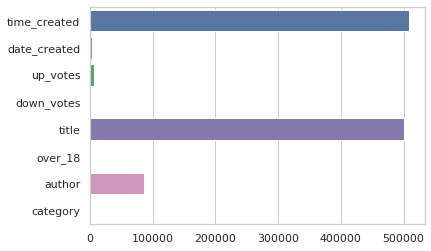

In [0]:
#Plotting the graph for visualizing the above findings.
sns.set(style="whitegrid")
ax = sns.barplot(data=unique_df,orient = 'h')

In [3]:
# Checking for duplicate values
df[df.duplicated()]

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
4179,1208626819,2008-04-19,0,0,Mortal Kombat vs. DC Universe xbox 360 game pr...,False,Aerik,worldnews
5593,1210005800,2008-05-05,0,0,Independent News Reports Surge In Sadr City ...,False,MikaelMN,worldnews
7567,1211901242,2008-05-27,0,0,"Trouble comes in threes, with quakes it is man...",False,BookWormPride,worldnews
11684,1216100913,2008-07-15,0,0,redditors are often keen to talk about conspir...,False,cthulhufhtagn,worldnews
11876,1216254290,2008-07-17,0,0,Saudi king opens inter-faith summit,False,cup,worldnews
56926,1274795505,2010-05-25,0,0,Germany After the EU and the Russian Scenario,False,greenHaired,worldnews


In [3]:
#After dropping the duplicates 
df.drop_duplicates().head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [4]:
# Dropping category and down_votes as they have same values.
df.drop(columns=["down_votes","category"],axis = 1, inplace = True)

In [5]:
# Extracting Year the article was published.
df["year"] = pd.to_datetime(df['date_created']).dt.year

In [7]:
df.head()

,time_created,date_created,up_votes,title,over_18,author,year
0,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,False,polar,2008
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,polar,2008
2,1201232523,2008-01-25,3,US presses Egypt on Gaza border,False,polar,2008
3,1201233290,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420,2008
4,1201274720,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,2008


In [8]:
"""
    Number of articles published Each year.
    
"""
df[["title","year"]].groupby("year").count()

,title
year,
2008,22505
2009,25115
2010,23313
2011,38886
2012,42643
2013,88231
2014,92030
2015,94621
2016,81892


# Text Preprocessing

In [6]:
#Checking for top 20 most repeated words - Gives insights on data specific stop words.

common_words = pd.Series(' '.join(df["title"]).split()).value_counts()
common_words[:20]

to       204943
in       196008
the      176203
of       170501
a         93169
and       84224
s         78501
for       75960
on        70010
-         40879
as        36251
by        35947
is        35737
with      34999
The       34700
from      31750
at        28978
has       27895
that      27592
after     24864
dtype: int64

In [7]:
# Building our Stop words list to be removed. - Take list of inbuilt stopwords and customizing it by added stopwords specific to this documents (From most common words generated in above step)
stop_words = set(stopwords.words("english")) 

#Adding common words of this document to stop_words
add_words = ["to","in","the","of","a","and","s","-","as","by","for","is","with","The","from","at","has","that","after"]
stop_words = stop_words.union(add_words)

In [8]:
#Below is the function to clean the text and prepare it for next phase. 
from tqdm import tqdm
corpus = []
def clean_content(data):
    cleaned_content = []

    for sent in tqdm(data):
        
        #remove html content
        review_content = BeautifulSoup(sent).get_text()
            
        #remove non-alphabetic characters
        review_content = re.sub("[^a-zA-Z]"," ", review_content)
    
        #tokenize the sentences
        words = word_tokenize(review_content.lower())
    
        #lemmatize each word to its lemma
        lem = WordNetLemmatizer()
        lemma_words = [lem.lemmatize(word) for word in words if not word in stop_words] 
        lemma_words = " ".join(lemma_words)
        cleaned_content.append(lemma_words)
        
        corpus.append(lemma_words)
        
        
    return(cleaned_content)

In [9]:
# Calling the clean_content method to clean the titel column of the dataset
df["cleaned_content"] = clean_content(df["title"])

  0%|▏                                                                        | 1617/509236 [00:01<30:06:18,  4.68it/s]D:\Anaconda\lib\site-packages\bs4\__init__.py:335: UserWarning: "http://mentalmasturbator.com/2008/03/21/democrats-losing-electoral-advantage/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
  5%|███▊                                                                     | 26872/509236 [00:10<03:31, 2279.81it/s]D:\Anaconda\lib\site-packages\bs4\__init__.py:335: UserWarning: "http://www.comcast.net/data/fan/html/popup.html?v=1030143489&pl=Comcast/1030032788.xml&launchpoint=Cover&cid=fancover&attr=default_headline&config=/config/common/fan/default.xml" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document beh

In [10]:
df.head()

,time_created,date_created,up_votes,title,over_18,author,year,cleaned_content
0,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,False,polar,2008,score killed pakistan clash
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,polar,2008,japan resume refuelling mission
2,1201232523,2008-01-25,3,US presses Egypt on Gaza border,False,polar,2008,u press egypt gaza border
3,1201233290,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420,2008,jump start economy give health care
4,1201274720,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,2008,council europe bash eu un terror blacklist


# Data Exploration

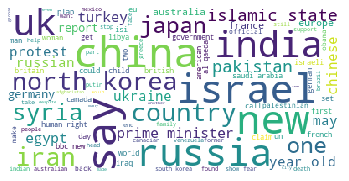

In [15]:
#Visualizing the content after pre-processing for most frequently used words.
wordcloud = WordCloud(
                    background_color = "white",
                    stopwords = stop_words,
                    max_words = 100,
                    max_font_size = 50).generate(str(corpus))

# Displaying the word cloud
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

[Text(0, 0, 'say'),
 Text(0, 0, 'china'),
 Text(0, 0, 'new'),
 Text(0, 0, 'year'),
 Text(0, 0, 'attack'),
 Text(0, 0, 'syria'),
 Text(0, 0, 'russia'),
 Text(0, 0, 'world'),
 Text(0, 0, 'state'),
 Text(0, 0, 'government'),
 Text(0, 0, 'police'),
 Text(0, 0, 'israel'),
 Text(0, 0, 'iran'),
 Text(0, 0, 'president'),
 Text(0, 0, 'killed'),
 Text(0, 0, 'people'),
 Text(0, 0, 'war'),
 Text(0, 0, 'russian'),
 Text(0, 0, 'country'),
 Text(0, 0, 'minister')]

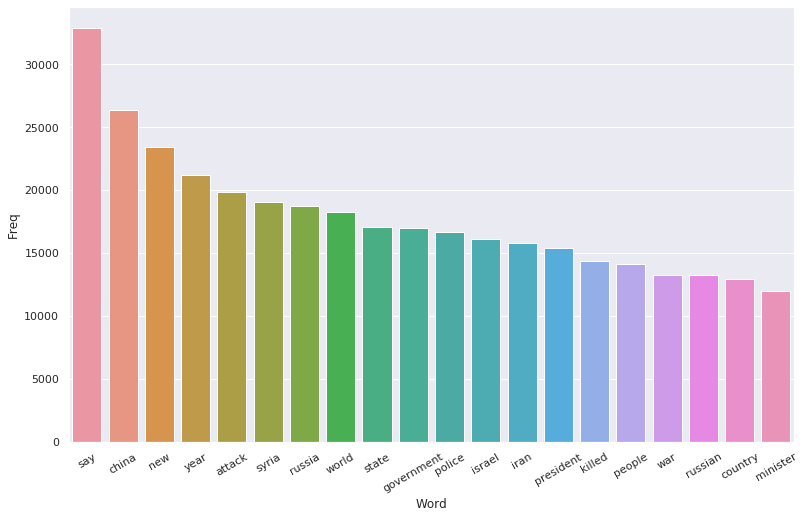

In [16]:
#Visualizing the Most frequently occuring words after cleanup process. 
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [41]:
# Defining a count vectorizer 
cv = CountVectorizer(max_df = 0.95, min_df = 2, stop_words= stop_words)
dtm = cv.fit_transform(df["cleaned_content"])

# Topic Modelling using LDA


    Since the news is categorised into only worldnews, i will further split it into 5 more topics using LDA.

In [44]:
LDA5 = LatentDirichletAllocation(n_components=5,random_state=42)

In [45]:
LDA5.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [46]:
#dump(LDA5,"LDA5.joblib")

['LDA5.joblib']

In [47]:
# Displaying top 15 words of all the topics
for index,topic in enumerate(LDA5.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['court', 'man', 'muslim', 'egypt', 'death', 'gaza', 'israeli', 'year', 'palestinian', 'right', 'israel', 'woman', 'protest', 'news', 'police']


THE TOP 15 WORDS FOR TOPIC #1
['german', 'internet', 'law', 'european', 'korean', 'china', 'bank', 'eu', 'uk', 'minister', 'government', 'say', 'new', 'north', 'korea']


THE TOP 15 WORDS FOR TOPIC #2
['talk', 'obama', 'un', 'election', 'military', 'leader', 'israel', 'ukraine', 'state', 'nuclear', 'war', 'say', 'president', 'russia', 'iran']


THE TOP 15 WORDS FOR TOPIC #3
['islamic', 'russian', 'state', 'strike', 'al', 'rebel', 'iraq', 'say', 'kill', 'isi', 'force', 'syrian', 'syria', 'killed', 'attack']


THE TOP 15 WORDS FOR TOPIC #4
['south', 'one', 'oil', 'found', 'first', 'sea', 'india', 'chinese', 'people', 'million', 'new', 'japan', 'year', 'world', 'china']




In [49]:
topic_result = LDA5.transform(dtm)
topic_result.shape

(509236, 5)

In [50]:
# Assigning the topic to the articles in the dataframe
df["topic"] = topic_result.argmax(axis=1)

In [51]:
df.head()

,time_created,date_created,up_votes,title,over_18,author,year,cleaned_content,sentimental_scores,compound_sentiment,sentiment,topic
0,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,False,polar,2008,score killed pakistan clash,"{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp...",-0.6705,0,3
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,polar,2008,japan resume refuelling mission,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,4
2,1201232523,2008-01-25,3,US presses Egypt on Gaza border,False,polar,2008,u press egypt gaza border,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,0
3,1201233290,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420,2008,jump start economy give health care,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.4939,1,4
4,1201274720,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,2008,council europe bash eu un terror blacklist,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",-0.5267,0,2


# Sentimental Analysis

Performed Sentiment Analysis to classify the sentence into Positive sentence or negative sentence.

Input: 
    
    Title column of the dataFrame. 
    
Output:
    
    Sentimental score report card with percentage of negative, positive, neutral and compound sentiment.
    Using this score report card, classified the sentence into possitive or negative sentence.
    0 - Negative Sentence
    1 - Positive Sentence

In [11]:
# Initializing the sentimental Intenity Analyzer
sid = SentimentIntensityAnalyzer()

In [12]:
# checking the polarity scores for first 5 articles
for i in range(0,5):
  print(sid.polarity_scores(df.loc[i]["title"]))

{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'compound': -0.6705}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.4939}
{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'compound': -0.5267}


In [13]:
#Appending sentimental scores to the data frame
df["sentimental_scores"] = df["title"].apply(lambda x: sid.polarity_scores(x))

In [14]:
#Extracting the compount score.
df["compound_sentiment"] = df["sentimental_scores"].apply(lambda score_dict: score_dict["compound"]) 

In [15]:
df.head()

,time_created,date_created,up_votes,title,over_18,author,year,cleaned_content,sentimental_scores,compound_sentiment
0,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,False,polar,2008,score killed pakistan clash,"{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp...",-0.6705
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,polar,2008,japan resume refuelling mission,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,1201232523,2008-01-25,3,US presses Egypt on Gaza border,False,polar,2008,u press egypt gaza border,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,1201233290,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420,2008,jump start economy give health care,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.4939
4,1201274720,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,2008,council europe bash eu un terror blacklist,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",-0.5267


In [16]:
# Adding sentiment: where 0 - negative sentiment and 1 - positive sentiment
df["sentiment"] = df["compound_sentiment"].apply(lambda x: 1 if x >= 0 else 0)
df.head()

,time_created,date_created,up_votes,title,over_18,author,year,cleaned_content,sentimental_scores,compound_sentiment,sentiment
0,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,False,polar,2008,score killed pakistan clash,"{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp...",-0.6705,0
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,polar,2008,japan resume refuelling mission,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
2,1201232523,2008-01-25,3,US presses Egypt on Gaza border,False,polar,2008,u press egypt gaza border,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
3,1201233290,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420,2008,jump start economy give health care,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.4939,1
4,1201274720,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,2008,council europe bash eu un terror blacklist,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",-0.5267,0


# Tf-Idf vectorizing

In [20]:
"""
    The text data before feeding to the Input of the machine learning model should be converted to numerical format
    as the machine learning model works only on the numerical data.

    To achieve this we are converting the text data into vectors using TfIdf vectors.
"""
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df["cleaned_content"])

In [21]:
tfidf_matrix.shape

(509236, 74580)

In [38]:
# Taking backup of tfidfvector model.
#dump(tfidf,"tfidf.joblib")

['tfidf.joblib']

# Machine Learning Model to predict weather a given sentence has positve or negative sentiment

Objective: 
        Given a Sentence, Try to Predict whether its a positive sentiment or Negative Sentiment.
        Trained a Support Vector Classifier model to Take sentence as input and Predict whether its a positive
        sentiment or negative sentiment.

Input:  
        Sentence to check if its a positive sentence or negative sentence. 
        
Output:
        0: If its a negative sentiment.
        1: If its a Positive sentiment


In [25]:
"""
Defining Y variable to be sentiments.

Performing Train test split to prepare the inputs to feed into Support Vector Classifier model.

"""
y = np.array(df["sentiment"])
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size = 0.2, shuffle = True, random_state = 42)

In [26]:
# Defining the Support Vecto Classifier.
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

In [27]:
# Fitting the model to the training dataSet.
SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
# Making prediction on test sample.
pred = SVM.predict(X_test)

In [32]:
print(metrics.confusion_matrix(y_test,pred))

[[50704  3122]
 [ 3557 44465]]


In [33]:
"""

    Below is the classification report of the model.
    We can check the Precision, recall, f1 and support scores.
    
"""
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     53826
           1       0.93      0.93      0.93     48022

    accuracy                           0.93    101848
   macro avg       0.93      0.93      0.93    101848
weighted avg       0.93      0.93      0.93    101848



In [34]:
#Taking the backup of the model
#dump(SVM, "svcModel.joblib")

['svcModel.joblib']